# Importação das bibliotecas

In [36]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import math
from sklearn import linear_model, datasets, metrics
from sklearn import svm
from sklearn.datasets import fetch_mldata
from sklearn.decomposition import PCA, RandomizedPCA
from sklearn.neural_network import MLPClassifier, BernoulliRBM
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

# Funções úteis

In [37]:
def plot_gallery(images, titles, h, w, n_row=3, n_col=4):
    plt.figure(figsize=(1.8 * n_col, 2.4 * n_row))
    plt.subplots_adjust(bottom=0, left=.01, right=.99,
                        top=.90, hspace=.35)
    for i in range(n_row * n_col):
        plt.subplot(n_row, n_col, i + 1)
        plt.imshow(images[i].reshape((h, w)), cmap=plt.cm.gray)
        plt.title(titles[i], size=12)
        plt.xticks(())
        plt.yticks(())
        
def show_image(image, shape, label="", cmp=None):
    img = np.reshape(image,shape)
    plt.imshow(img,cmap=cmp, interpolation='none')
    plt.title(label)

# Carrega o Dataset

In [38]:
mnist = fetch_mldata("MNIST original")

# Pré-processamento

In [65]:
X_train, X_test, y_train, y_test = train_test_split(mnist.data / 255., mnist.target, test_size=0.25)
print('Utilizamos %d amostras para treinamento e %d amostras para teste' % (len(X_train), len(X_test)))

n_samples = mnist.data.shape[0]
n_features = mnist.data.shape[1]

target_names = ['0', '1', '2', '3', '4', '5', '6', '7', '8', '9']

print('numero de amostras total do dataset:', n_samples)
print('numero de features:', n_features)

n_components = 16

pca = PCA(n_components=n_components, svd_solver='randomized', whiten=True).fit(X_train)

pca_numbers = pca.components_.reshape((n_components, 28, 28))
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)

Utilizamos 52500 amostras para treinamento e 17500 amostras para teste
numero de amostras total do dataset: 70000
numero de features: 784


# Plot de algumas imagens do Dataset

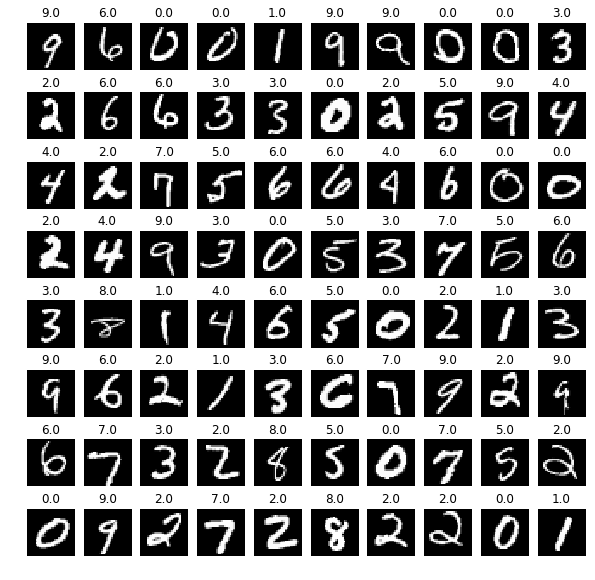

In [66]:
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_train[i],(28,28), y_train[i], cmp="gray")
plt.show()

# Plot das imagens após o redimensionamento

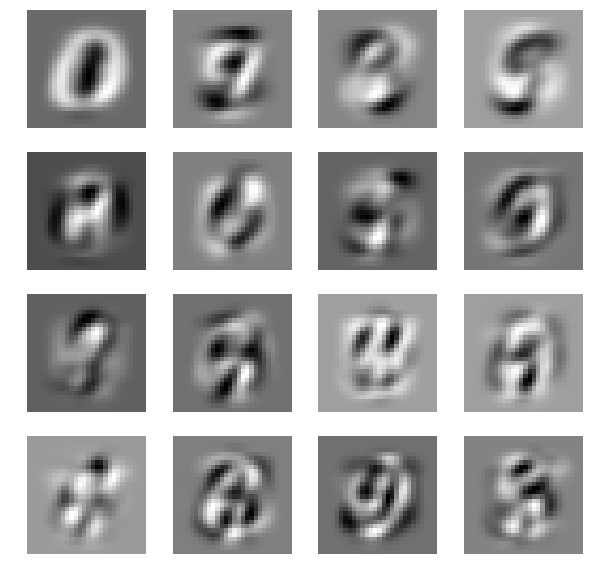

In [67]:
pcanumber_titles= []
for i in range(mnist.data.shape[0]):
    pcanumber_titles.append(" ")

plt.figure(figsize=(10,10))
y, x = 4,4
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(pca_numbers[i],(28,28), pcanumber_titles[i], cmp="gray")
plt.show()

# Treinamento utilizando 2 camadas ocultas

In [111]:
mlp = MLPClassifier(hidden_layer_sizes=(89,89), activation='tanh', max_iter=1000, alpha=1e-5,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)
#activation : {‘identity’, ‘logistic’, ‘tanh’, ‘relu’}

In [112]:
mlp.fit(X_train, y_train)
y_pred = mlp.predict(X_test)
print("Training set score WITHOUT pca: %f" % mlp.score(X_train, y_train))
print("Test set score WITHOUT pca: %f" % mlp.score(X_test, y_test))

Iteration 1, loss = 0.28713318
Iteration 2, loss = 0.12814033
Iteration 3, loss = 0.08945739
Iteration 4, loss = 0.06904086
Iteration 5, loss = 0.05259823
Iteration 6, loss = 0.04239019
Iteration 7, loss = 0.03336972
Iteration 8, loss = 0.02589151
Iteration 9, loss = 0.02137981
Iteration 10, loss = 0.01602424
Iteration 11, loss = 0.01199077
Iteration 12, loss = 0.00940084
Iteration 13, loss = 0.00660068
Iteration 14, loss = 0.00493930
Iteration 15, loss = 0.00365621
Iteration 16, loss = 0.00272386
Iteration 17, loss = 0.00219343
Iteration 18, loss = 0.00183889
Iteration 19, loss = 0.00157915
Iteration 20, loss = 0.00140327
Iteration 21, loss = 0.00126304
Iteration 22, loss = 0.00113227
Iteration 23, loss = 0.00104386
Iteration 24, loss = 0.00096927
Iteration 25, loss = 0.00089375
Iteration 26, loss = 0.00084179
Iteration 27, loss = 0.00079171
Iteration 28, loss = 0.00074208
Iteration 29, loss = 0.00069580
Iteration 30, loss = 0.00066437
Iteration 31, loss = 0.00063011
Iteration 32, los

In [113]:
mlp_pca = MLPClassifier(hidden_layer_sizes=(89,89), activation='tanh', max_iter=1000, alpha=1e-5,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)

mlp_pca.fit(X_train_pca, y_train)
y_pred_pca = mlp_pca.predict(X_test_pca)
print("Training set score WITH pca: %f" % mlp_pca.score(X_train_pca, y_train))
print("Test set score WITH pca: %f" % mlp_pca.score(X_test_pca, y_test))

Iteration 1, loss = 0.39894360
Iteration 2, loss = 0.19457766
Iteration 3, loss = 0.15192093
Iteration 4, loss = 0.12902785
Iteration 5, loss = 0.11471990
Iteration 6, loss = 0.10389978
Iteration 7, loss = 0.09545544
Iteration 8, loss = 0.08831612
Iteration 9, loss = 0.08262108
Iteration 10, loss = 0.07665422
Iteration 11, loss = 0.07368799
Iteration 12, loss = 0.06754810
Iteration 13, loss = 0.06380103
Iteration 14, loss = 0.06014782
Iteration 15, loss = 0.05657569
Iteration 16, loss = 0.05380890
Iteration 17, loss = 0.04939325
Iteration 18, loss = 0.04816873
Iteration 19, loss = 0.04500287
Iteration 20, loss = 0.04191228
Iteration 21, loss = 0.03931401
Iteration 22, loss = 0.03702075
Iteration 23, loss = 0.03571667
Iteration 24, loss = 0.03357649
Iteration 25, loss = 0.03148263
Iteration 26, loss = 0.02900603
Iteration 27, loss = 0.02759446
Iteration 28, loss = 0.02571463
Iteration 29, loss = 0.02454196
Iteration 30, loss = 0.02218554
Iteration 31, loss = 0.02070223
Iteration 32, los

In [63]:
#mlp_pca.coefs_

# Classification Reports

In [114]:
print('Classification Report without pca')
print(classification_report(y_test, y_pred, target_names=target_names))

Classification Report without pca
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1697
          1       0.99      0.99      0.99      1967
          2       0.97      0.98      0.98      1693
          3       0.97      0.97      0.97      1834
          4       0.98      0.98      0.98      1735
          5       0.98      0.97      0.97      1578
          6       0.99      0.99      0.99      1744
          7       0.97      0.98      0.98      1821
          8       0.98      0.97      0.97      1699
          9       0.97      0.97      0.97      1732

avg / total       0.98      0.98      0.98     17500



In [115]:
print('Classification Report using pca')
print(classification_report(y_test, y_pred_pca, target_names=target_names))

Classification Report using pca
             precision    recall  f1-score   support

          0       0.98      0.98      0.98      1697
          1       0.99      0.99      0.99      1967
          2       0.95      0.96      0.96      1693
          3       0.96      0.95      0.96      1834
          4       0.98      0.96      0.97      1735
          5       0.96      0.96      0.96      1578
          6       0.98      0.98      0.98      1744
          7       0.96      0.96      0.96      1821
          8       0.95      0.95      0.95      1699
          9       0.93      0.95      0.94      1732

avg / total       0.96      0.96      0.96     17500



# Validação Cruzada

In [116]:
print('Validação cruzada do treinamento sem a utilização do PCA')
scores = cross_val_score(mlp,X_train,y_train)
np.mean(scores)

Validação cruzada do treinamento sem a utilização do PCA
Iteration 1, loss = 0.34581223
Iteration 2, loss = 0.15581839
Iteration 3, loss = 0.11030279
Iteration 4, loss = 0.08235298
Iteration 5, loss = 0.06347551
Iteration 6, loss = 0.04977813
Iteration 7, loss = 0.04003430
Iteration 8, loss = 0.02967727
Iteration 9, loss = 0.02307482
Iteration 10, loss = 0.01812412
Iteration 11, loss = 0.01332943
Iteration 12, loss = 0.00942644
Iteration 13, loss = 0.00755992
Iteration 14, loss = 0.00592053
Iteration 15, loss = 0.00400010
Iteration 16, loss = 0.00321157
Iteration 17, loss = 0.00275437
Iteration 18, loss = 0.00241837
Iteration 19, loss = 0.00200255
Iteration 20, loss = 0.00177763
Iteration 21, loss = 0.00158386
Iteration 22, loss = 0.00146230
Iteration 23, loss = 0.00138568
Iteration 24, loss = 0.00124348
Iteration 25, loss = 0.00116250
Iteration 26, loss = 0.00107936
Iteration 27, loss = 0.00100495
Iteration 28, loss = 0.00094031
Iteration 29, loss = 0.00089086
Iteration 30, loss = 0.0

0.97352375022547533

In [118]:
metrics.accuracy_score(y_test,y_pred)

0.97834285714285718

In [119]:
print('Validação cruzada do treinamento utilizando PCA para fazer o redimencionamento das imagens')
scores = cross_val_score(mlp_pca,X_train_pca,y_train)
np.mean(scores)

Validação cruzada do treinamento utilizando PCA para fazer o redimencionamento das imagens
Iteration 1, loss = 0.46972441
Iteration 2, loss = 0.23733731
Iteration 3, loss = 0.17988240
Iteration 4, loss = 0.15052277
Iteration 5, loss = 0.13134024
Iteration 6, loss = 0.11812858
Iteration 7, loss = 0.10576834
Iteration 8, loss = 0.09660199
Iteration 9, loss = 0.08843097
Iteration 10, loss = 0.08221049
Iteration 11, loss = 0.07601618
Iteration 12, loss = 0.07098323
Iteration 13, loss = 0.06444093
Iteration 14, loss = 0.06084472
Iteration 15, loss = 0.05678977
Iteration 16, loss = 0.05213279
Iteration 17, loss = 0.04851025
Iteration 18, loss = 0.04494869
Iteration 19, loss = 0.04207590
Iteration 20, loss = 0.03875386
Iteration 21, loss = 0.03600389
Iteration 22, loss = 0.03277433
Iteration 23, loss = 0.03048114
Iteration 24, loss = 0.02849130
Iteration 25, loss = 0.02534334
Iteration 26, loss = 0.02425843
Iteration 27, loss = 0.02233663
Iteration 28, loss = 0.02024603
Iteration 29, loss = 0

0.95973345337550597

In [120]:
metrics.accuracy_score(y_test,y_pred_pca)

0.96399999999999997

In [121]:
y_pred_pca[:50]

array([ 3.,  2.,  2.,  1.,  9.,  2.,  0.,  7.,  1.,  0.,  2.,  7.,  8.,
        5.,  5.,  5.,  5.,  7.,  3.,  2.,  8.,  6.,  0.,  0.,  8.,  1.,
        8.,  8.,  4.,  7.,  9.,  5.,  3.,  9.,  8.,  7.,  4.,  3.,  1.,
        3.,  1.,  4.,  1.,  9.,  5.,  8.,  4.,  8.,  8.,  1.])

In [122]:
y_pred[:50]

array([ 3.,  2.,  2.,  1.,  9.,  2.,  0.,  7.,  1.,  0.,  2.,  7.,  8.,
        5.,  5.,  5.,  5.,  7.,  3.,  2.,  8.,  6.,  0.,  0.,  8.,  1.,
        8.,  8.,  4.,  7.,  9.,  5.,  3.,  9.,  8.,  7.,  4.,  3.,  1.,
        3.,  1.,  4.,  1.,  9.,  5.,  8.,  4.,  8.,  8.,  1.])

In [123]:
y_test[:50]

array([ 3.,  2.,  2.,  1.,  9.,  2.,  0.,  7.,  1.,  0.,  2.,  7.,  8.,
        5.,  5.,  5.,  5.,  7.,  3.,  2.,  8.,  6.,  0.,  0.,  8.,  1.,
        8.,  8.,  4.,  7.,  9.,  5.,  3.,  9.,  8.,  7.,  4.,  3.,  1.,
        3.,  1.,  4.,  1.,  9.,  5.,  8.,  4.,  8.,  5.,  1.])

# # Avaliação das predições para rede com 2 camadas ocultas

SEM REDIMENSIONAMENTO


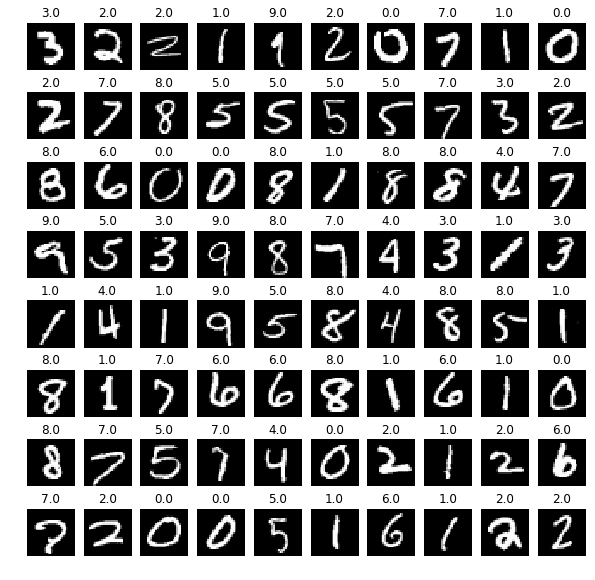

In [124]:
print("SEM REDIMENSIONAMENTO")
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_test[i],(28,28), y_pred[i], cmp="gray")
plt.show()

COM REDIMENSIONAMENTO


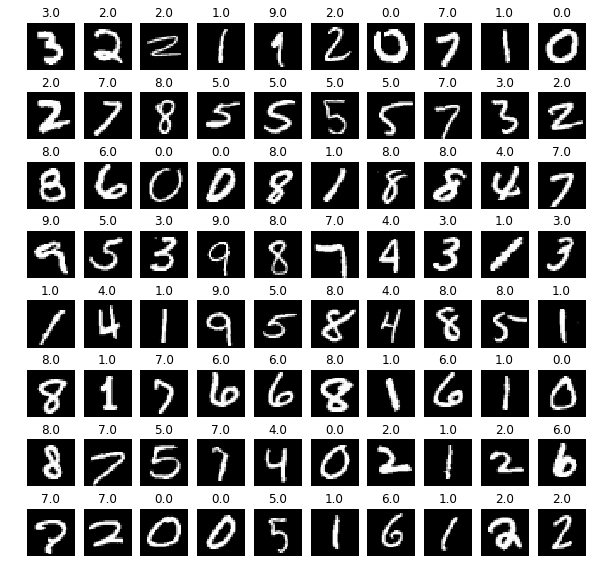

In [125]:
print("COM REDIMENSIONAMENTO")
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_test[i],(28,28), y_pred_pca[i], cmp="gray")
plt.show()

# Treinamento utilizando 4 camadas ocultas

In [126]:
mlp2 = MLPClassifier(hidden_layer_sizes=(89,89,45,44), activation='tanh', max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)

In [127]:
mlp2.fit(X_train, y_train)
y_pred2 = mlp2.predict(X_test)
print("Training set score WITHOUT pca: %f" % mlp2.score(X_train, y_train))
print("Test set score WITHOUT pca: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 0.29046186
Iteration 2, loss = 0.12459083
Iteration 3, loss = 0.09073553
Iteration 4, loss = 0.07099960
Iteration 5, loss = 0.05839399
Iteration 6, loss = 0.04774346
Iteration 7, loss = 0.03856266
Iteration 8, loss = 0.03542948
Iteration 9, loss = 0.02815765
Iteration 10, loss = 0.02590800
Iteration 11, loss = 0.02177883
Iteration 12, loss = 0.02070010
Iteration 13, loss = 0.01519749
Iteration 14, loss = 0.01494004
Iteration 15, loss = 0.01386237
Iteration 16, loss = 0.01066937
Iteration 17, loss = 0.00939039
Iteration 18, loss = 0.00711285
Iteration 19, loss = 0.00340960
Iteration 20, loss = 0.00204636
Iteration 21, loss = 0.00138529
Iteration 22, loss = 0.00096736
Iteration 23, loss = 0.00088066
Iteration 24, loss = 0.00076901
Iteration 25, loss = 0.00070812
Iteration 26, loss = 0.00068104
Iteration 27, loss = 0.00064025
Iteration 28, loss = 0.00061815
Iteration 29, loss = 0.00059521
Iteration 30, loss = 0.00057556
Iteration 31, loss = 0.00055003
Iteration 32, los

In [129]:
mlp2_pca = MLPClassifier(hidden_layer_sizes=(89,89,45,44), activation='tanh', max_iter=1000, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-5, random_state=1,
                    learning_rate_init=.1)

In [130]:
mlp2_pca.fit(X_train_pca, y_train)
y_pred_pca2 = mlp2_pca.predict(X_test_pca)
print("Training set score USING pca: %f" % mlp2_pca.score(X_train_pca, y_train))
print("Test set score USING pca: %f" % mlp2_pca.score(X_test_pca, y_test))

Iteration 1, loss = 0.36940478
Iteration 2, loss = 0.17610185
Iteration 3, loss = 0.14071496
Iteration 4, loss = 0.12255139
Iteration 5, loss = 0.10705630
Iteration 6, loss = 0.09552620
Iteration 7, loss = 0.08676183
Iteration 8, loss = 0.08173881
Iteration 9, loss = 0.07363054
Iteration 10, loss = 0.06934986
Iteration 11, loss = 0.06449148
Iteration 12, loss = 0.05847698
Iteration 13, loss = 0.05697309
Iteration 14, loss = 0.05054388
Iteration 15, loss = 0.04859257
Iteration 16, loss = 0.04642426
Iteration 17, loss = 0.04358679
Iteration 18, loss = 0.04002011
Iteration 19, loss = 0.03889738
Iteration 20, loss = 0.03607006
Iteration 21, loss = 0.03098050
Iteration 22, loss = 0.03109012
Iteration 23, loss = 0.02931641
Iteration 24, loss = 0.02807468
Iteration 25, loss = 0.02853990
Iteration 26, loss = 0.02955963
Iteration 27, loss = 0.02427895
Iteration 28, loss = 0.02524781
Iteration 29, loss = 0.02372631
Iteration 30, loss = 0.02686555
Iteration 31, loss = 0.02646374
Iteration 32, los

# Classification Reports

In [131]:
print('Classification Report WITHOUT pca')
print(classification_report(y_test, y_pred2, target_names=target_names))

Classification Report WITHOUT pca
             precision    recall  f1-score   support

          0       0.98      0.99      0.99      1697
          1       0.99      0.99      0.99      1967
          2       0.97      0.98      0.98      1693
          3       0.98      0.97      0.97      1834
          4       0.98      0.98      0.98      1735
          5       0.98      0.97      0.98      1578
          6       0.99      0.99      0.99      1744
          7       0.98      0.98      0.98      1821
          8       0.98      0.97      0.98      1699
          9       0.96      0.98      0.97      1732

avg / total       0.98      0.98      0.98     17500



In [132]:
print("Acurácia da predição sem PCA: ")
metrics.accuracy_score(y_test,y_pred2)

Acurácia da predição sem PCA: 


0.97954285714285716

In [133]:
print('Classification Report using pca')
print(classification_report(y_test, y_pred_pca2, target_names=target_names))

Classification Report using pca
             precision    recall  f1-score   support

          0       0.98      0.97      0.98      1697
          1       0.97      0.99      0.98      1967
          2       0.96      0.96      0.96      1693
          3       0.95      0.95      0.95      1834
          4       0.96      0.97      0.96      1735
          5       0.96      0.93      0.95      1578
          6       0.96      0.98      0.97      1744
          7       0.96      0.96      0.96      1821
          8       0.94      0.94      0.94      1699
          9       0.94      0.92      0.93      1732

avg / total       0.96      0.96      0.96     17500



In [134]:
print("Acurácia da predição com PCA: ")
metrics.accuracy_score(y_test,y_pred_pca2)

Acurácia da predição com PCA: 


0.95897142857142859

# Validação Cruzada

In [135]:
print('Validação cruzada do treinamento SEM a utilização do PCA')
scores = cross_val_score(mlp2,X_train,y_train)
np.mean(scores)

Validação cruzada do treinamento SEM a utilização do PCA
Iteration 1, loss = 0.35148948
Iteration 2, loss = 0.14791723
Iteration 3, loss = 0.10595961
Iteration 4, loss = 0.07887759
Iteration 5, loss = 0.06110883
Iteration 6, loss = 0.05156218
Iteration 7, loss = 0.03886985
Iteration 8, loss = 0.03000226
Iteration 9, loss = 0.02515421
Iteration 10, loss = 0.01878174
Iteration 11, loss = 0.01411737
Iteration 12, loss = 0.01428340
Iteration 13, loss = 0.01067617
Iteration 14, loss = 0.00617288
Iteration 15, loss = 0.00802721
Iteration 16, loss = 0.00938707
Iteration 17, loss = 0.00699942
Training loss did not improve more than tol=0.000010 for two consecutive epochs. Stopping.
Iteration 1, loss = 0.35201672
Iteration 2, loss = 0.14828311
Iteration 3, loss = 0.10427713
Iteration 4, loss = 0.08303368
Iteration 5, loss = 0.06208658
Iteration 6, loss = 0.05132929
Iteration 7, loss = 0.04233109
Iteration 8, loss = 0.03283981
Iteration 9, loss = 0.02552328
Iteration 10, loss = 0.02007284
Iterat

0.97192429873086761

In [136]:
print('Validação cruzada do treinamento COM a utilização do PCA')
scores = cross_val_score(mlp2_pca,X_train_pca,y_train)
np.mean(scores)

Validação cruzada do treinamento COM a utilização do PCA
Iteration 1, loss = 0.43648175
Iteration 2, loss = 0.20676491
Iteration 3, loss = 0.16015898
Iteration 4, loss = 0.13547189
Iteration 5, loss = 0.11629154
Iteration 6, loss = 0.10653792
Iteration 7, loss = 0.09389976
Iteration 8, loss = 0.08729359
Iteration 9, loss = 0.07516115
Iteration 10, loss = 0.06591726
Iteration 11, loss = 0.06238061
Iteration 12, loss = 0.05489491
Iteration 13, loss = 0.04999771
Iteration 14, loss = 0.04486471
Iteration 15, loss = 0.04315915
Iteration 16, loss = 0.03735662
Iteration 17, loss = 0.03691871
Iteration 18, loss = 0.03174182
Iteration 19, loss = 0.02859364
Iteration 20, loss = 0.02511847
Iteration 21, loss = 0.02446744
Iteration 22, loss = 0.02337748
Iteration 23, loss = 0.02350442
Iteration 24, loss = 0.01823585
Iteration 25, loss = 0.01477723
Iteration 26, loss = 0.01180522
Iteration 27, loss = 0.01179595
Iteration 28, loss = 0.00953604
Iteration 29, loss = 0.00671350
Iteration 30, loss = 0.0

0.96028575921968651

# Avaliação das predições para rede com 4 camadas ocultas

SEM REDIMENSIONAMENTO


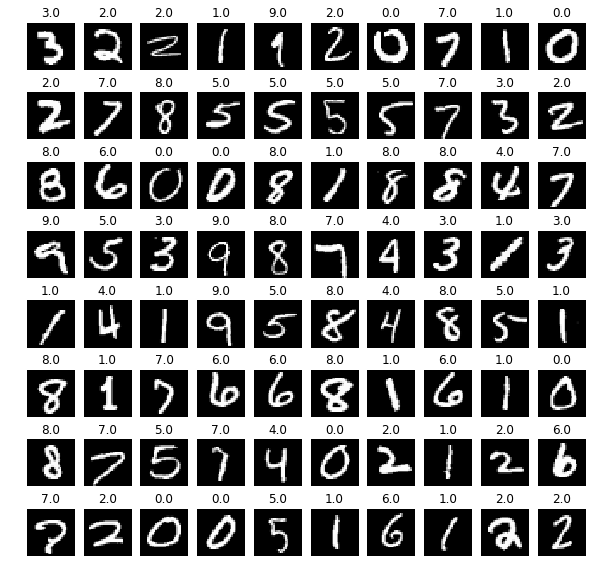

In [137]:
print("SEM REDIMENSIONAMENTO")
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_test[i],(28,28), y_pred2[i], cmp="gray")
plt.show()

COM REDIMENSIONAMENTO


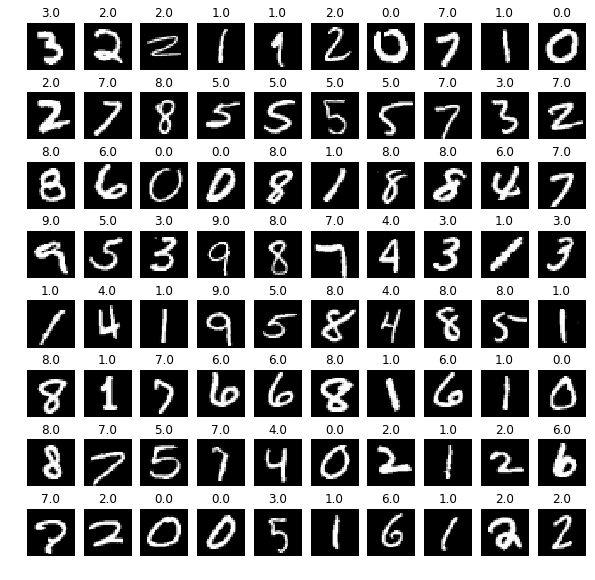

In [138]:
print("COM REDIMENSIONAMENTO")
plt.figure(figsize=(10,10))
y, x = 8,10
for i in range(0,(y*x)):
    plt.subplot(y, x, i+1)
    plt.axis("off")
    show_image(X_test[i],(28,28), y_pred_pca2[i], cmp="gray")
plt.show()